In [ ]:
# default_exp lesson1

# Lesson 1

> Notes and code for lesson 1 of the course.

In [ ]:
#hide
from nbdev.showdoc import *
from computational_linear_algebra.core import *
%config autocompleter.use_jedi=False

# Why study Numerical Linear Algebra 
> referred to as `NLA` from now

A bullet point summary:

- A few key NLA algorithms such as QR factorization, simplex algorithm and matrix decomposition are listed in the top 10 algorithms of the 20th century.
- You find NLA everywhere: optimizing queues in stores, inventory management, satisfying multiple constraints in complicated systems, etc.
- A majority of important problems in the real world are modelled using differential equations, a lot of which aren't solvable using analytitcal methods. NLA gives us methods to get around that and obtain arbitrarily accurate solutions to equations you can't solve otherwise.
- Applications include Machine Learning, Deep Learning, recommendations systems, graph analytics, etc.

**The focus of the course will be knowing how to do matrix computations with acceptable speed and accuracy**

This notebook will give you a light flavor of what the course will be all about. It will also cover accuracy when dealing with floating point values, along with image convolutions, a very useful application of linear algebra in deep learning.

# Matrix and Tensor products

## Matrix-vector and Matrix-Matrix Products

In Python 3, the `@` symbol is used for matrix multiplications of numpy arrays

In [ ]:
a = np.arange(12).reshape(3, 4)
b = np.arange(12).reshape(4, 3)
c = np.arange(4)

print_all(a@b, b@a, a@c, c@a.T, c@b)

[[ 42  48  54]
 [114 136 158]
 [186 224 262]]
[[ 20  23  26  29]
 [ 56  68  80  92]
 [ 92 113 134 155]
 [128 158 188 218]]
[14 38 62]
[14 38 62]
[42 48 54]


# Matrix Decompositions

Further in the course, we will be learning about matrix decompositions being used for:
1. Background removal from images using robust PCA and truncated SVD
2. Google's PageRank algorithm
3. Topic Modelling using SVD and NMF

More info at : [Matrix Factorization Jungle](https://sites.google.com/site/igorcarron2/matrixfactorizations)

# Accuracy

A look at how very trivially inaccuracies can crop up in code involving math:
When you run the loop 10 times, you should see `0.4`
And after 80 iterations, you should see `0.6`.
Notice how quickly we deviate from our expected values

In [ ]:
def f(x):
    if x <= 1/2:
        return 2 * x
    else:
        return 2 * x - 1
def g(x, times):
    for i in range(times):
        x = f(x)
        print(x)

In [ ]:
g(0.1, 10)

0.2
0.4
0.8
0.6000000000000001
0.20000000000000018
0.40000000000000036
0.8000000000000007
0.6000000000000014
0.20000000000000284
0.4000000000000057


In [ ]:
g(0.1, 80)

0.2
0.4
0.8
0.6000000000000001
0.20000000000000018
0.40000000000000036
0.8000000000000007
0.6000000000000014
0.20000000000000284
0.4000000000000057
0.8000000000000114
0.6000000000000227
0.20000000000004547
0.40000000000009095
0.8000000000001819
0.6000000000003638
0.2000000000007276
0.4000000000014552
0.8000000000029104
0.6000000000058208
0.20000000001164153
0.40000000002328306
0.8000000000465661
0.6000000000931323
0.20000000018626451
0.40000000037252903
0.8000000007450581
0.6000000014901161
0.20000000298023224
0.4000000059604645
0.800000011920929
0.6000000238418579
0.20000004768371582
0.40000009536743164
0.8000001907348633
0.6000003814697266
0.20000076293945312
0.40000152587890625
0.8000030517578125
0.600006103515625
0.20001220703125
0.4000244140625
0.800048828125
0.60009765625
0.2001953125
0.400390625
0.80078125
0.6015625
0.203125
0.40625
0.8125
0.625
0.25
0.5
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


# Not all floating points are created equal

According to IEEE double precision arithmetic, numbers can be as large as `1.73 x 10^308` and as small as `2.23 x 10^-308`
Just to give a sense of why these exact numbers: `log2(1.73 x 10^308)` = `1024`

- The interval $[1,2]$ is represented by discrete subset: 
$$1, \: 1+2^{-52}, \: 1+2 \times 2^{-52},\: 1+3 \times 2^{-52},\: \ldots, 2$$

- The interval $[2,4]$ is represented:
$$2, \: 2+2^{-51}, \: 2+2 \times 2^{-51},\: 2+3 \times 2^{-51},\: \ldots, 4$$



This website tells us about why this is the case: http://www.volkerschatz.com/science/float.html

A summary:
- All representable numbers in computers are rationals. And since irrationals are dense and rationals aren't (another way of saying that we probably have way more irrationals than rationals), we've already lost a huge chunk of the real numbers right here.
- Floats aren't equidistant. They keep getting farther and farther as we move away from zero
![image.png](images/fltscale.svg)
The above is what it would look like if you had 8 bits to represent your floats

- Only (reduced) fractions with power-of-two denominators are representable accurately. Any other fraction will give an infinite number of fracitonal digits in binary reprsentation (it's getting worse as we go along)

More Caveats:
- 64 bit integers may not fit into doubles, unless you know that the integer only uses 53 bits for representation.
- Be careful with iterative computations, as we showed previously, such errors can easily massively affect you final results.
- rounding off, again, can be problematic
- If you add a non-power-of-two integer to a float, your final result will not be accurate.
- Addition is more problematic than multiplication. Adding `2^-53^` to 10 will have no effect. The reason has to do with the number scale being more logarithmic than linear.
- For trignometric functions like `sin(x)`, you probably won't get an output of `0` other than at `x=0`. No known multiple of `pi` can be represnted accuractely by floating point numbers.

# Conditioning and Stability

---
- Conitioning: perturbation behaviour of a mathematical problem. That is, how much does the solution change with minor changes in the input when solved analytically.
- Stability: perturbation behaviour of an algorithm used to solve that problem on a computer. That is, how much does the solution change when the inputs to the algorithm change, on a computer
---
Example of an unstable problem:

In [ ]:
import scipy.linalg as la
a = np.array([[1, 1000], [0, 1]])
b = np.array([[1, 1000], [0.001, 1]])

print_all(a, b)

[[   1 1000]
 [   0    1]]
[[1.e+00 1.e+03]
 [1.e-03 1.e+00]]


In [ ]:
np.set_printoptions(suppress=True, precision=4)

In [ ]:
wA, vrA = la.eig(a)
wB, vrB = la.eig(b)
print_all(wA, wB)

[1.+0.j 1.+0.j]
[2.+0.j 0.+0.j]


### Sometimes, Aprroximations are better: Bloom Filters

A bloom filter can be use to check for set membership with 1% false positives, using <10 bits per element. This comes with reductions in memory usage by a factor of thousands of times.
For applications where positive examples are rare, like malicious websites (a majorit of the web is safe), we can take any positive examples and then run them through a full list for a an membership test.

# Extras:

- Sometimes floating point errors can cause bilions of dollars of losses and multiple deaths too. Rockets launches have failed, missiles have been misfired, banks have lost money, and so much more that we don't even know yet! Enough said!

More things we'll be learning about:
- Sparse vs dense matrices
- Speed (vectorization, locality, etc.)
- Scalability
- Parallelization

#### Matrix Computation Packages:

[BLAS (Basic Linear Algebra Subprograms)](http://www.netlib.org/blas/): specification for low-level matrix and vector arithmetic operations. These are the standard building blocks for performing basic vector and matrix operations.  BLAS originated as a Fortran library in 1979.  Examples of BLAS libraries include: AMD Core Math Library (ACML), ATLAS, Intel Math Kernel Library (MKL), and OpenBLAS.

[LAPACK](http://www.netlib.org/lapack/) is written in Fortran, provides routines for solving systems of linear equations, eigenvalue problems, and singular value problems.  Matrix factorizations (LU, Cholesky, QR, SVD, Schur).  Dense and banded matrices are handled, but not general sparse matrices.  Real and complex, single and double precision.

1970s and 1980s: EISPACK (eigenvalue routines) and LINPACK (linear equations and linear least-squares routines) libraries

**LAPACK original goal**: make LINAPCK and EISPACK run efficiently on shared-memory vector and parallel processors and exploit cache on modern cache-based architectures (initially released in 1992).  EISPACK and LINPACK ignore multi-layered memory hierarchies and spend too much time moving data around.

LAPACK uses highly optimized block operations implementations (which much be implemented on each machine) LAPACK written so as much of the computation as possible is performed by BLAS.

#### Locality:

Using slower ways to access data (e.g. over the internet) can be up to a billion times slower than faster ways (e.g. from a register). But there's much less fast storage than slow storage. So once we have data in fast storage, we want to do any computation required at that time, rather than having to load it multiple times each time we need it. In addition, for most types of storage its much faster to access data items that are stored next to each other, so we should try to always use any data stored nearby that we know we'll need soon. These two issues are known as locality.

Here are some *numbers everyone should know* (from the legendary [Jeff Dean](http://static.googleusercontent.com/media/research.google.com/en/us/people/jeff/stanford-295-talk.pdf)):
- L1 cache reference 0.5 ns
- L2 cache reference 7 ns
- Main memory reference/RAM 100 ns
- Send 2K bytes over 1 Gbps network 20,000 ns
- Read 1 MB sequentially from memory 250,000 ns
- Round trip within same datacenter 500,000 ns
- Disk seek 10,000,000 ns
- Read 1 MB sequentially from network 10,000,000 ns
- Read 1 MB sequentially from disk 30,000,000 ns
- Send packet CA->Netherlands->CA 150,000,000 ns

And here is an updated, interactive [version](https://people.eecs.berkeley.edu/~rcs/research/interactive_latency.html), which includes a timeline of how these numbers have changed.

**Key take-away**: Each successive memory type is (at least) an order of magnitude worse than the one before it.  Disk seeks are **very slow**.

This video has a great example of showing several ways you could compute the blur of a photo, with various trade-offs. Don't worry about the C code that appears, just focus on the red and green moving pictures of matrix computation.

Although the video is about a new language called Halide, it is a good illustration the issues it raises are universal.  Watch minutes 1-13:

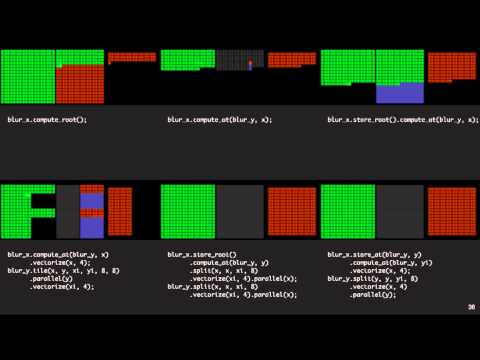

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("3uiEyEKji0M")

# Convolutions

In [ ]:
%matplotlib inline
import math, sys, os, numpy as np
from numpy.linalg import norm
from PIL import Image
from matplotlib import pyplot as plt, rcParams, rc
from scipy.ndimage import imread
from skimage.measure import block_reduce
import pickle as pickle
from scipy.ndimage.filters import correlate, convolve
rc('animation', html='html5')
rcParams['figure.figsize'] = (3, 6)
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [ ]:
f = plt.figure()

<Figure size 216x432 with 0 Axes>

In [ ]:
def plots(ims, interp=False, titles=None):
    ims = np.array(ims)
    mn, mx= ims.min(), ims.max()
    f = plt.figure(figsize=(12,24))
    for i in range(len(ims)):
        sp = f.add_subplot(1, len(ims), i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=mn, vmax=mx)

def plot(im, interp=False):
    f = plt.figure(figsize=(3,6), frameon=True)
    plt.imshow(im, interpolation=None if interp else 'none')
    
plt.gray()
plt.close()

# MNIST Data

In [ ]:
#export
def shapes(*args, **kwargs):
    """ Prints shapes of all arguments passed on separate lines """
    for arg in args:
        print(arg.shape)
    for key, value in kwargs.items():
        print(f"{key} : {value.shape}")

In [ ]:
from sklearn.datasets import load_digits
mnist = load_digits()

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [ ]:
shapes(mnist['data'], mnist['target'])

(1797, 64)
(1797,)


In [ ]:
images = np.reshape(mnist['data'], (1797, 8, 8))
labels = mnist['target'].astype(int)
n = len(images)
shapes(images, labels)

(1797, 8, 8)
(1797,)


In [ ]:
images = images / 255

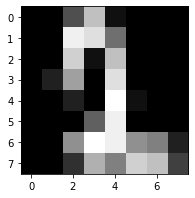

In [ ]:
plot(images[12])

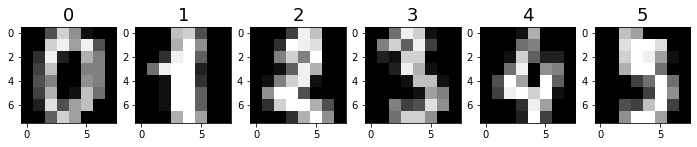

In [ ]:
plots(ims=images[:6], titles=labels[:6])

Zooming in on a letter

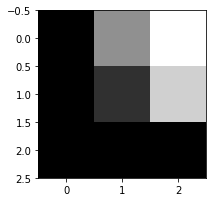

In [ ]:
plot(images[2, 5:, :3]) # BOTTOM LEFT OF THE 2 ABOVE

## Edge Detection

We can use convolution operations to detect certain kinds of edges in images by creating specific kernels

In [ ]:
top = np.array([[-1, -1, -1],
                [1, 1, 1],
                [0, 0, 0]])

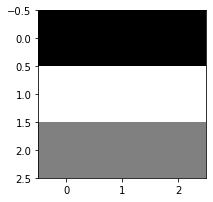

In [ ]:
plot(top)

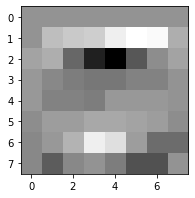

In [ ]:
idx = 0
corrtop = correlate(images[idx], top)
plot(corrtop)

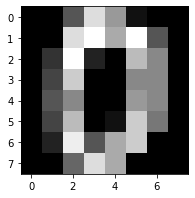

In [ ]:
plot(images[idx])

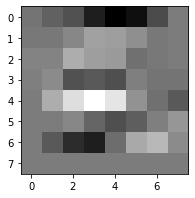

In [ ]:
idx = 9
convtop = convolve(images[idx], top)
plot(convtop)

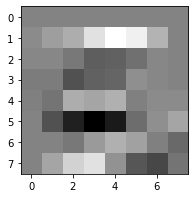

In [ ]:
convtop = convolve(images[idx], np.rot90(top, 2))
plot(convtop)

So, in essence, a correlation operation gives the same results as a convolution operation if the weights kernel is rotated by 180 degrees.

We can keep rotating our kernel matrix or use different weights altogether to detect different kinds of patterns in images.

This website has a very nice visual representation of how this can be achieved: http://setosa.io/ev/image-kernels/

![kernel image](images/edge_detect.png)